In [404]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading Data

In [405]:
bnb_df = pd.read_csv('AB_NYC_2019.csv')

In [406]:
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [407]:
bnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [408]:
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [409]:
print(f'Number of rows: {bnb_df.shape[0]}')
print(f'Number of columns: {bnb_df.shape[1]}')

Number of rows: 48895
Number of columns: 16


## 1.1 Cleaning Data

In [410]:
drop_list = ['id', 'host_id', 'host_name', 'last_review', 'name', 'neighbourhood']

In [411]:
bnb_df.drop(drop_list, axis=1, inplace=True)

In [412]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group                0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [413]:
# replace the missing values in 'reviews_per_month' with the mean
bnb_df['reviews_per_month'].fillna(bnb_df['reviews_per_month'].mean(), inplace=True)

/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_97028/3947556451.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bnb_df['reviews_per_month'].fillna(bnb_df['reviews_per_month'].mean(), inplace=True)


In [414]:
bnb_df.isna().sum()/bnb_df.shape[0]*100

neighbourhood_group               0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## 1.2 Statistics of the Data

In [415]:
bnb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,48895.0,1.373221,1.497775,0.01000,0.28000,1.22000,1.580000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [416]:
bnb_df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

# 2. Exploratory Data Analysis

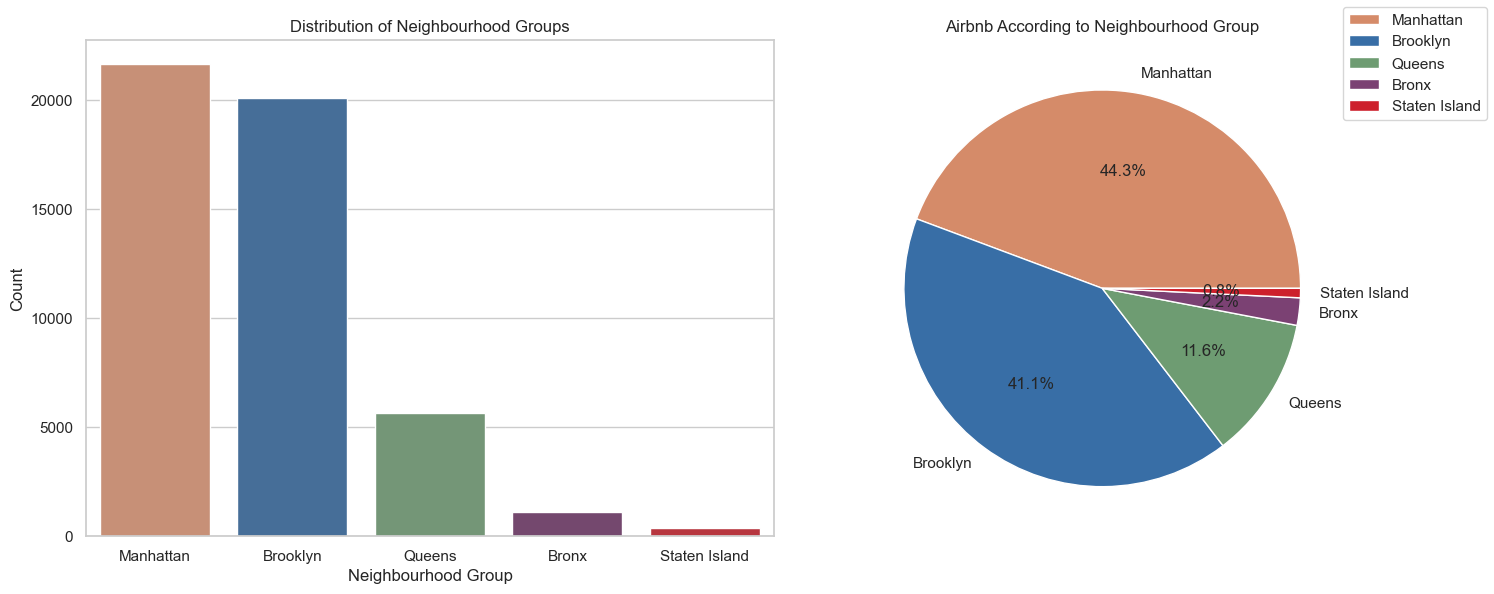

In [417]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.neighbourhood_group.value_counts().index
colors = ['#D58B69','#386EA6','#6E9C72','#7B4173','#CD202C']
explode = [0,0,0,0,0]
sizes = bnb_df.neighbourhood_group.value_counts().values

sns.countplot(x='neighbourhood_group', hue='neighbourhood_group',order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

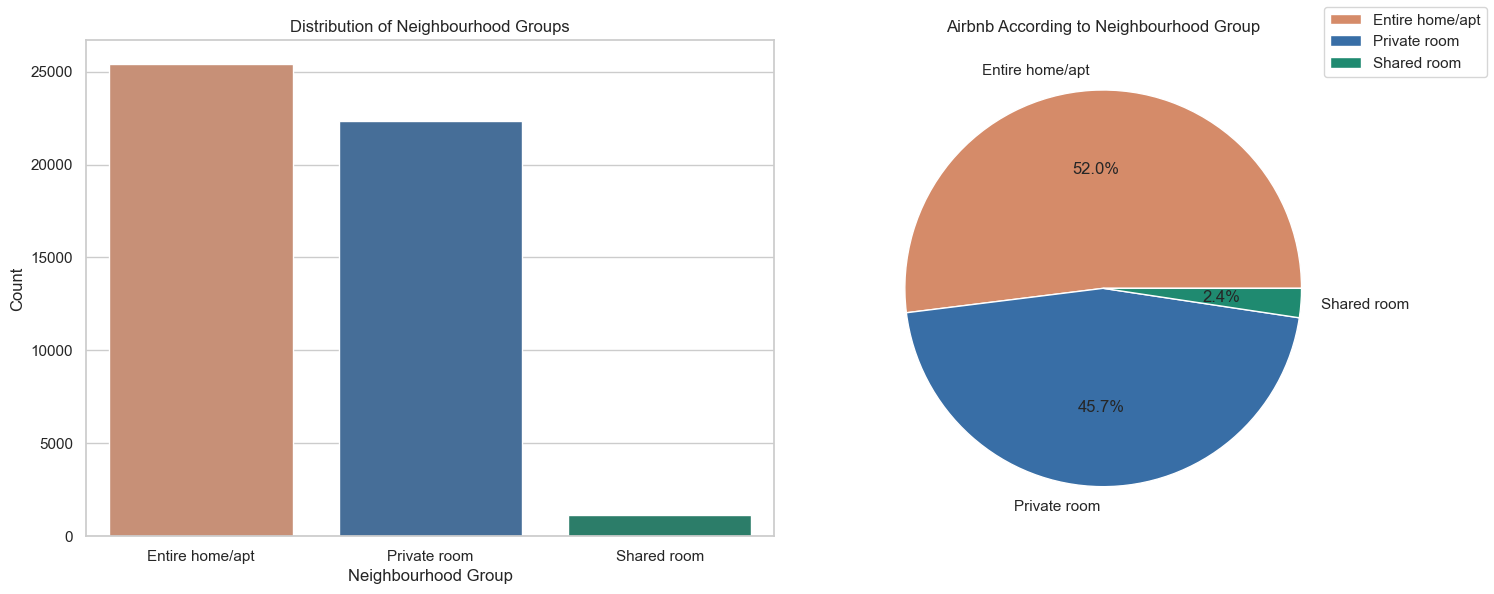

In [418]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = bnb_df.room_type.value_counts().index
colors = ['#D58B69','#386EA6','#1F8A70']
explode = [0,0,0]
sizes = bnb_df.room_type.value_counts().values

sns.countplot(x='room_type', hue='room_type', order=labels, data=bnb_df, ax=ax1, palette=dict(zip(labels, colors)))
ax1.set_title('Distribution of Neighbourhood Groups')
ax1.set_xlabel('Neighbourhood Group')
ax1.set_ylabel('Count')

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
ax2.set_title('Airbnb According to Neighbourhood Group')

fig.legend()

plt.tight_layout()
plt.show()

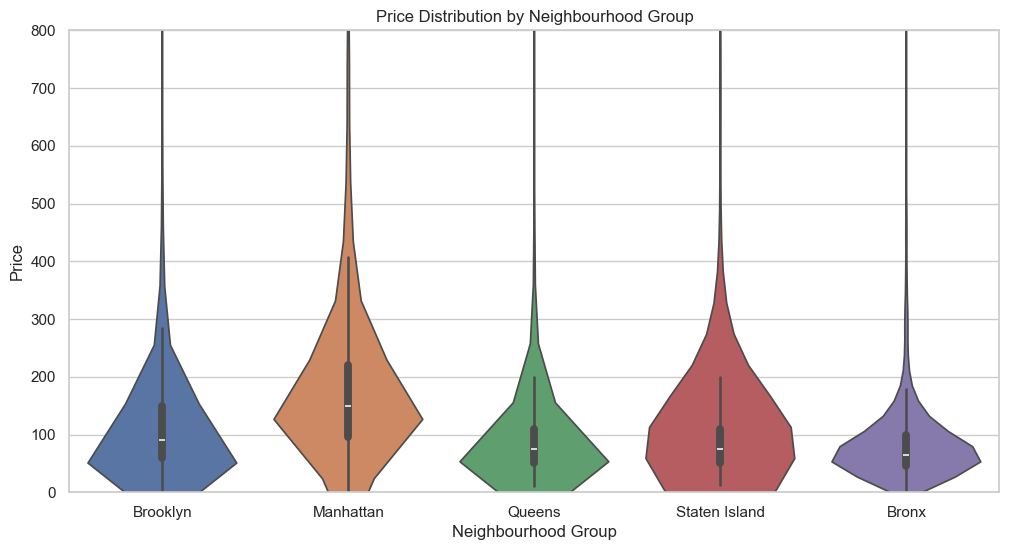

In [419]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.violinplot(x='neighbourhood_group', y='price', data=bnb_df, hue='neighbourhood_group')
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.ylim((0,800))
plt.show()

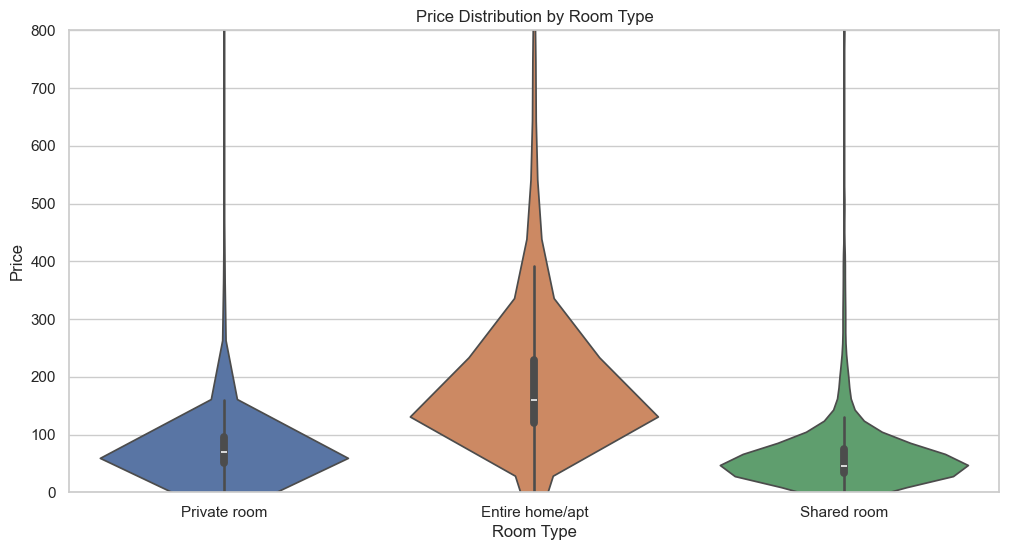

In [420]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='room_type', y='price', data=bnb_df, hue='room_type')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type') 
plt.ylabel('Price')
plt.ylim((0,800))
plt.show()

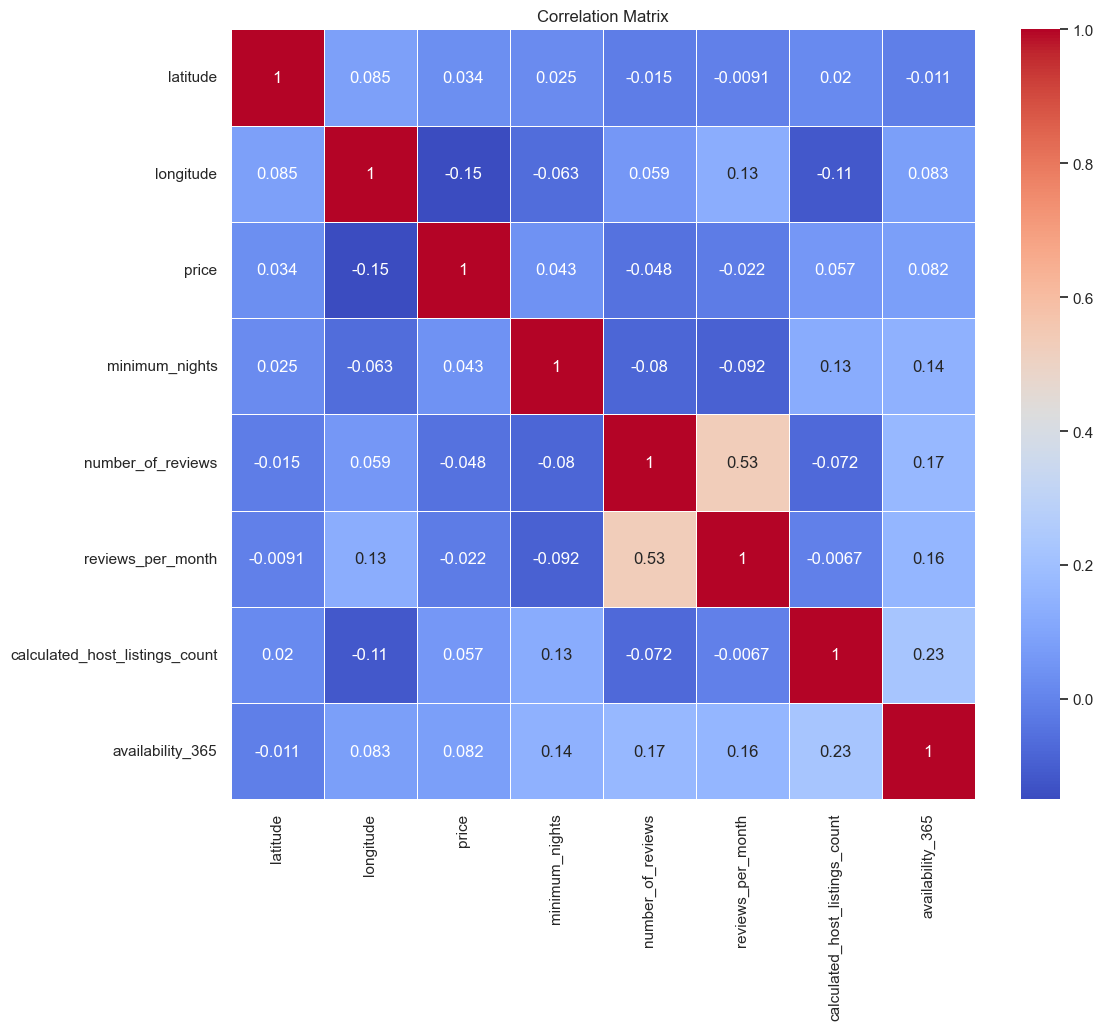

In [421]:
plt.figure(figsize=(12, 10))
corr_matrix = bnb_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


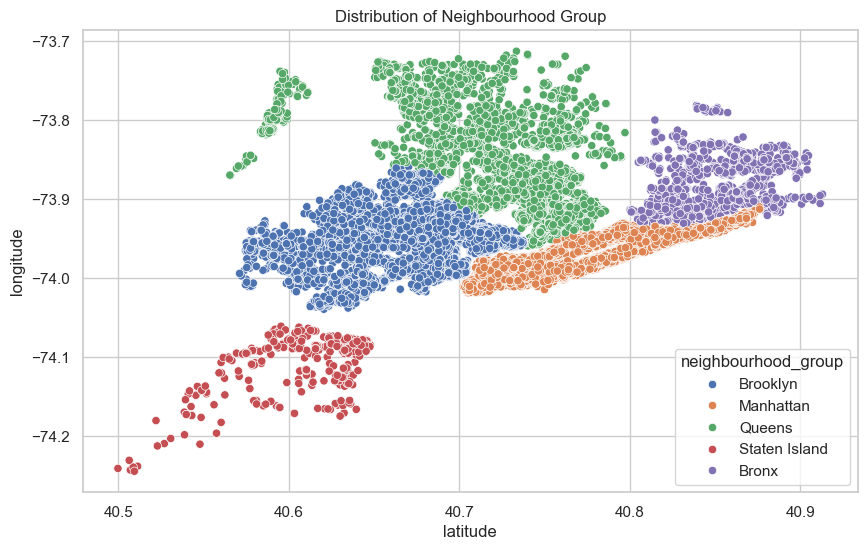

In [422]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'neighbourhood_group')
plt.title('Distribution of Neighbourhood Group')

plt.show()

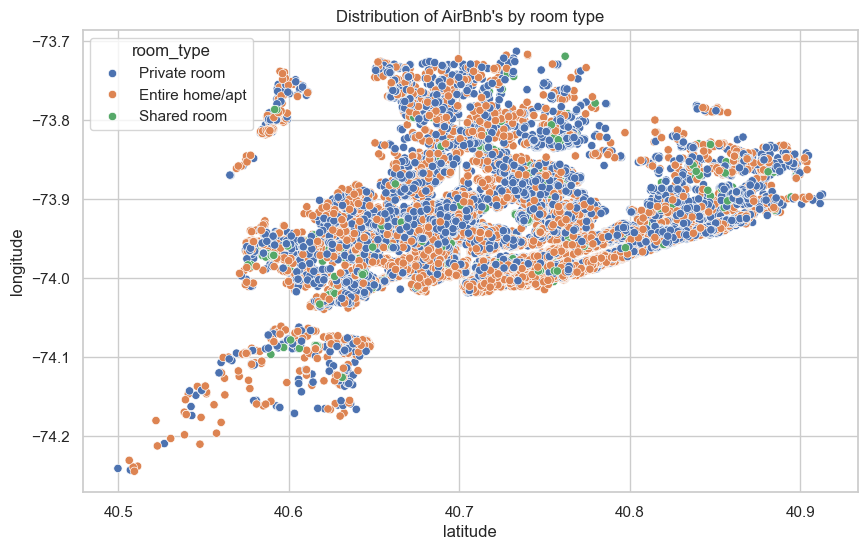

In [423]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='latitude', y='longitude', data= bnb_df, hue= 'room_type')
plt.title("Distribution of AirBnb's by room type")

plt.show()

<Figure size 1000x1000 with 0 Axes>

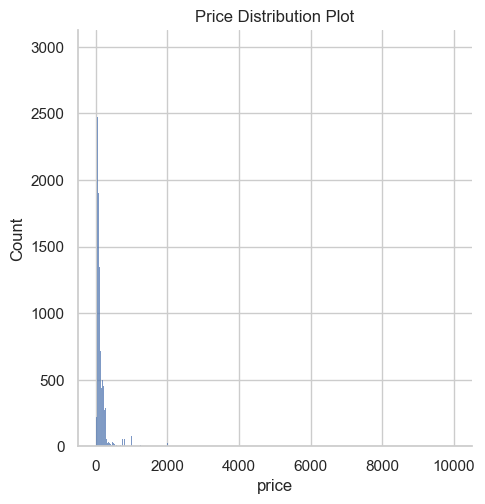

In [424]:
plt.figure(figsize=(10,10))
sns.displot(bnb_df['price'])
plt.title("Price Distribution Plot")
plt.show()

<Figure size 1000x600 with 0 Axes>

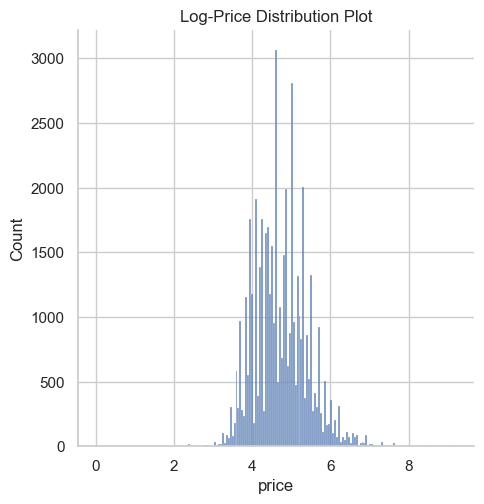

In [425]:
plt.figure(figsize=(10,6))
sns.displot(np.log1p(bnb_df['price']))
plt.title("Log-Price Distribution Plot")
plt.show()

### Outlier Distribution

<Figure size 1000x600 with 0 Axes>

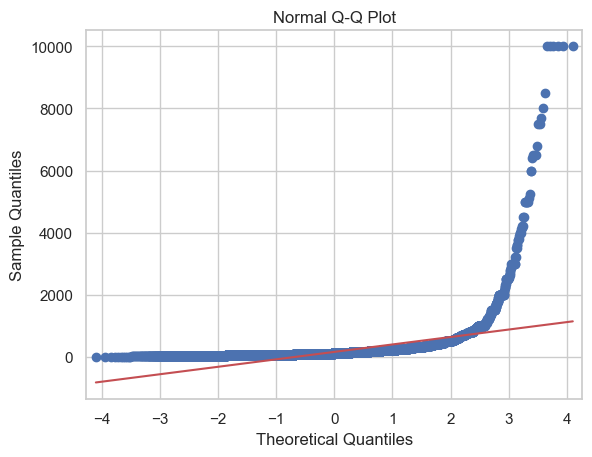

In [426]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(bnb_df['price'], line='s')
plt.title('Normal Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


The plot shows significant deviation from the straight line (red), especially in the upper tail. The data points form a curve, indicating that the data does not follow a normal distribution. Moreover, the extreme deviation in the upper tail suggests that the data has heavy tails. This means there are more extreme values in the dataset than would be expected in a normal distribution. The sharp curve on the right side suggests that the data is positively skewed, as we have shown in the graph above.

<Figure size 1000x600 with 0 Axes>

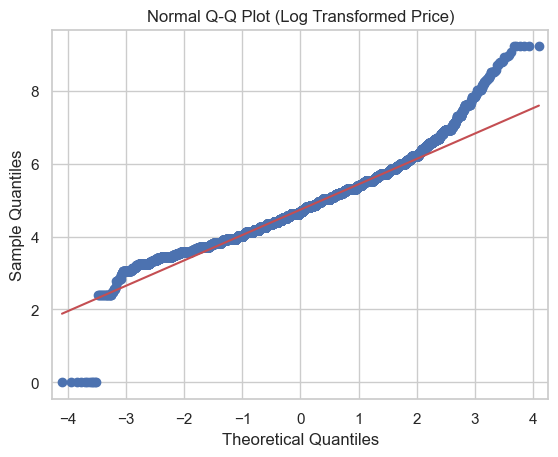

In [427]:
plt.figure(figsize=(10, 6))
sm.qqplot(np.log1p(bnb_df['price']), line='s')
plt.title('Normal Q-Q Plot (Log Transformed Price)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Feature Engeneering

In [428]:
bnb_df = pd.get_dummies(bnb_df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

In [429]:
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,True,False,False,False,True,False
1,40.75362,-73.98377,225,1,45,0.380000,2,355,False,True,False,False,False,False
2,40.80902,-73.94190,150,3,0,1.373221,1,365,False,True,False,False,True,False
3,40.68514,-73.95976,89,1,270,4.640000,1,194,True,False,False,False,False,False
4,40.79851,-73.94399,80,10,9,0.100000,1,0,False,True,False,False,False,False


In [430]:
for col in bnb_df.select_dtypes(include=['bool']).columns:
    bnb_df[col] = bnb_df[col].astype(int)

In [431]:
bnb_df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.210000,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.380000,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150,3,0,1.373221,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.640000,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,0.100000,1,0,0,1,0,0,0,0


In [432]:
print(bnb_df['price'].max(),
      bnb_df['minimum_nights'].max(),
      bnb_df['number_of_reviews'].max())

10000 1250 629


In [433]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [434]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [435]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [436]:
numeric_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Private room',
       'room_type_Shared room']

In [437]:
for col in numeric_features:
   if check_outlier(bnb_df, col):
      replace_with_thresholds(bnb_df, col)

/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_97028/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1123.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [438]:
print(bnb_df['price'].max(),
      bnb_df['minimum_nights'].max(),
      bnb_df['number_of_reviews'].max())

1952.5 111 535


In [439]:
bnb_df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149.0,1,9,0.210000,6,365,1,0,0,0,1,0
1,40.75362,-73.98377,225.0,1,45,0.380000,2,355,0,1,0,0,0,0
2,40.80902,-73.94190,150.0,3,0,1.373221,1,365,0,1,0,0,1,0
3,40.68514,-73.95976,89.0,1,270,4.640000,1,194,1,0,0,0,0,0
4,40.79851,-73.94399,80.0,10,9,0.100000,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70.0,2,0,1.373221,2,9,1,0,0,0,1,0
48891,40.70184,-73.93317,40.0,4,0,1.373221,2,36,1,0,0,0,1,0
48892,40.81475,-73.94867,115.0,10,0,1.373221,1,27,0,1,0,0,0,0
48893,40.75751,-73.99112,55.0,1,0,1.373221,6,2,0,1,0,0,0,1


In [440]:
bnb_df['log_price'] = np.log1p(bnb_df['price'])

In [441]:
bnb_df.drop('price', axis= 1, inplace=True)

In [442]:
bnb_df_x = bnb_df.drop('log_price', axis = 1)
bnb_df_y = bnb_df['log_price']

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


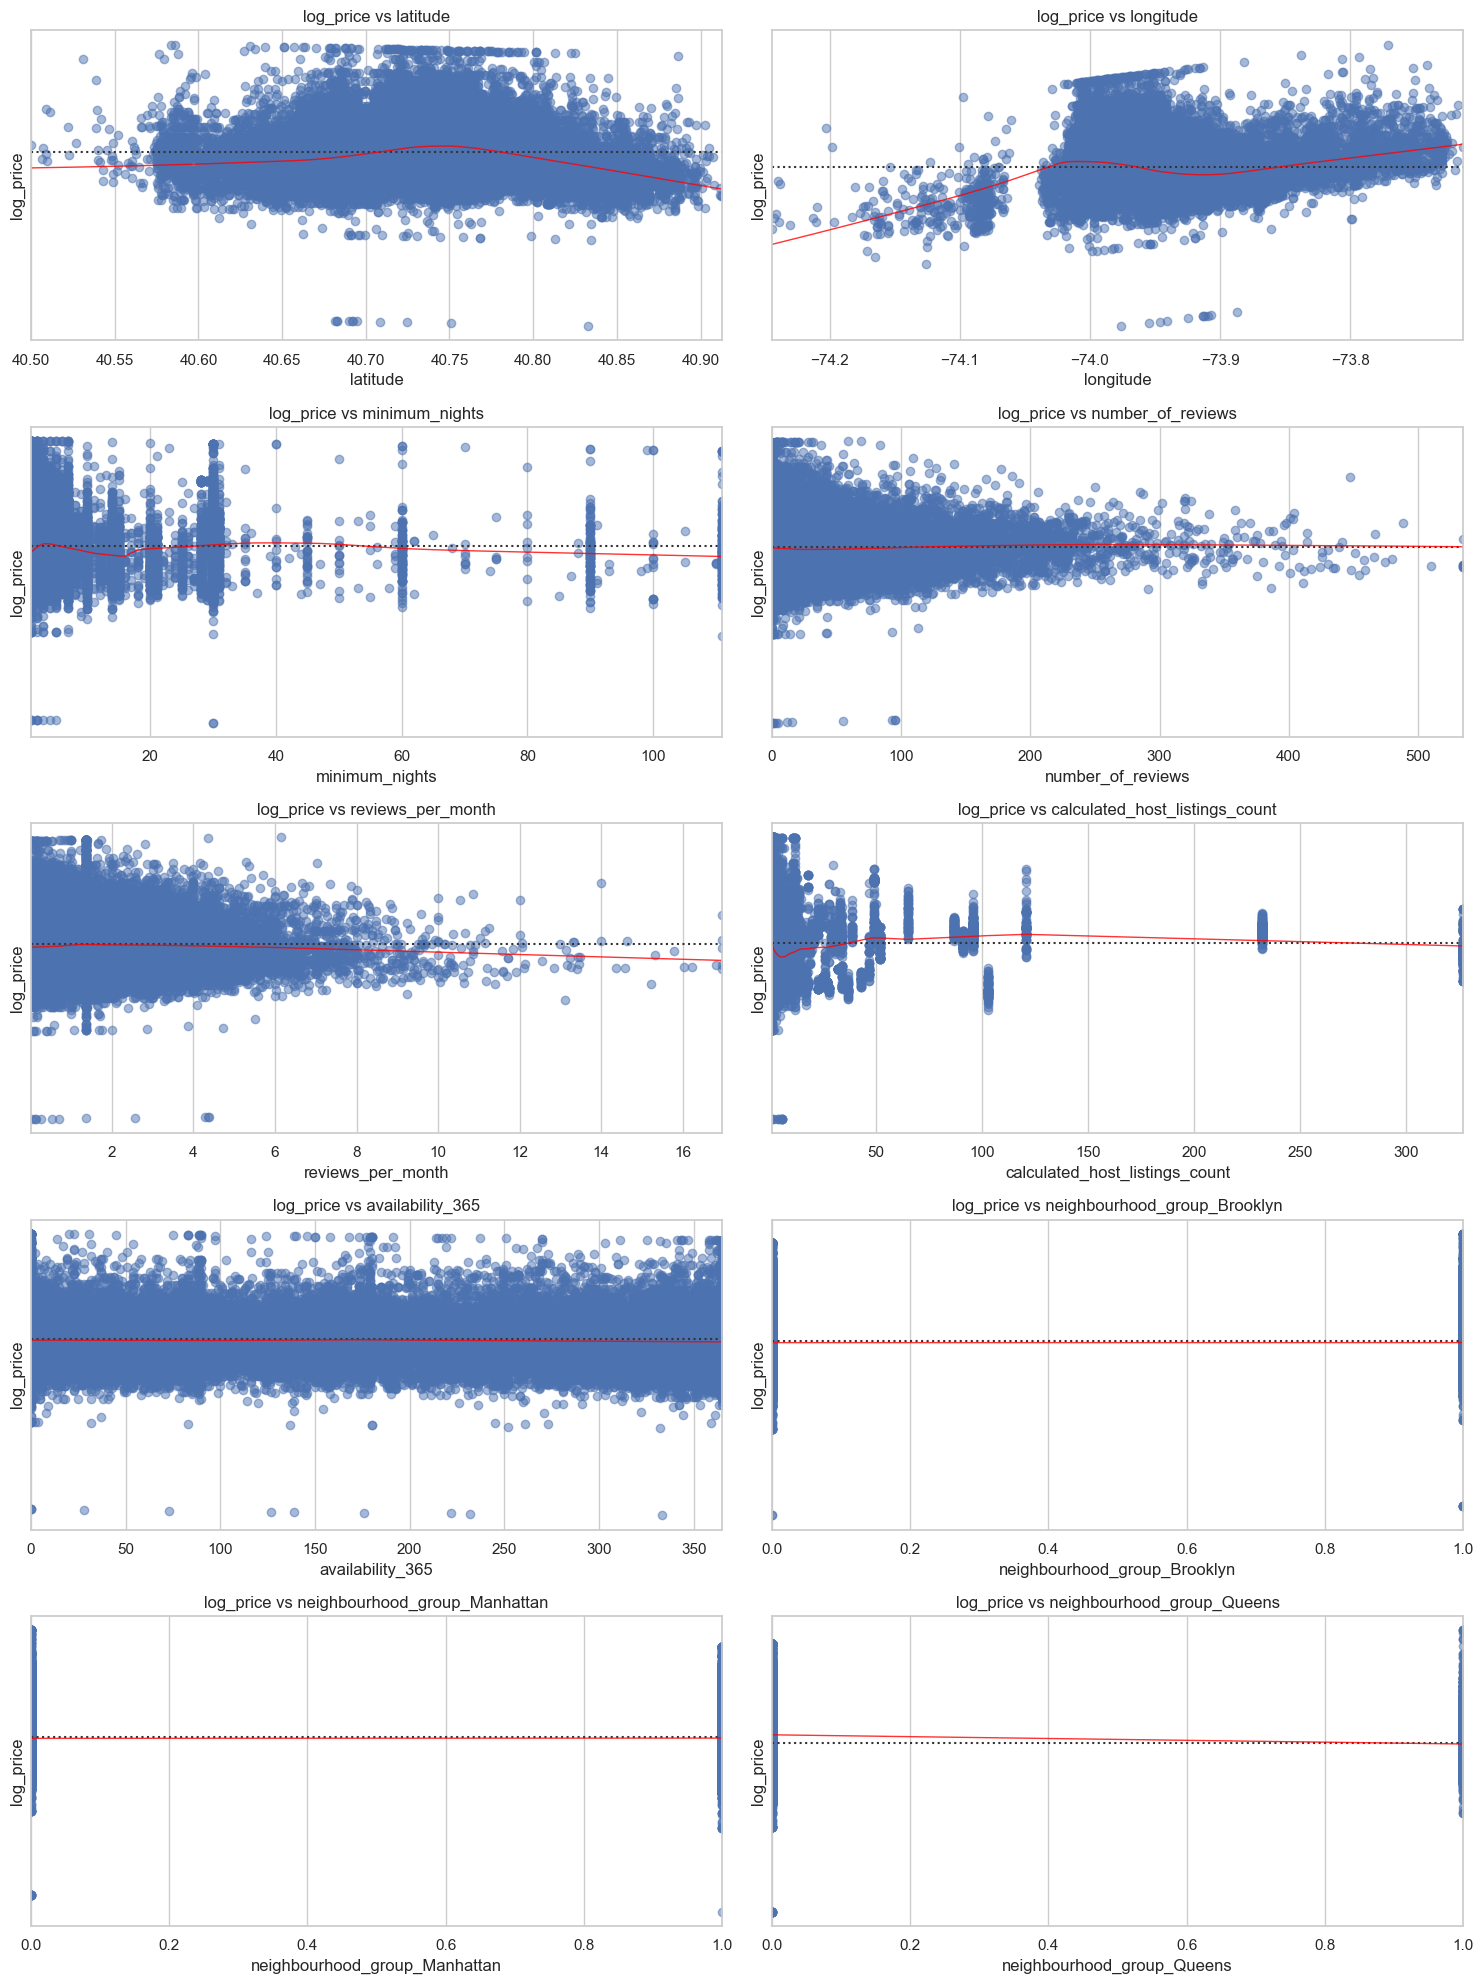

In [443]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))

for i in range(10):
    row = i // 2
    col = i % 2
    sns.residplot(x=bnb_df_x.iloc[:, i], y=bnb_df_y, lowess=True, ax=axes[row, col],
                  scatter_kws={'alpha': 0.5}, 
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    axes[row, col].set_title(f'log_price vs {bnb_df_x.columns[i]}')
    axes[row, col].set_ylabel('log_price')
    axes[row, col].set_xlabel(bnb_df_x.columns[i])


plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

# Model

In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV


class Model:
    def __init__(self, model, name=None, scaled=False):
        self.model = model
        self.name = name
        self.scaled = scaled

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    def __get_predictions(self, X_test):
        return self.model.predict(X_test)

    def get_metrics(self, X_test, y_test) -> pd.Series:
        y_pred = self.__get_predictions(X_test)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        r2 = metrics.r2_score(y_test, y_pred)
        metrics_series = pd.Series({
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R^2': r2,
            'Name': self.name if self.name else type(self.model).__name__
        })
        return metrics_series
    def cross_validate(self, X, y, cv):

        kf = KFold(n_splits=cv, shuffle=True, random_state=42)
        mse_scores = cross_val_score(self.model, X, y, scoring='neg_mean_squared_error', cv=kf)
        rmse_scores = np.sqrt(-mse_scores)
        mae_scores = cross_val_score(self.model, X, y, scoring='neg_mean_absolute_error', cv=kf)
        r2_scores = cross_val_score(self.model, X, y, scoring='r2', cv=kf)

        metrics_series = pd.Series({
            'MSE': -np.mean(mse_scores),
            'RMSE': np.mean(rmse_scores),
            'MAE': -np.mean(mae_scores),
            'R^2': np.mean(r2_scores),
            'Name': self.name if self.name else type(self.model).__name__
        })
        return metrics_series

    def visualize_metrics(self, X_test, y_test):
        y_pred = self.__get_predictions(X_test)

        residuals = y_test - y_pred
        
        plt.figure(figsize=(15, 10))
        
        # residuals distribution
        plt.subplot(2, 2, 1)
        sns.histplot(residuals, bins=30, edgecolor='black', kde=True)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title('Distribution of Residuals')

        # predicted vs actual values
        plt.subplot(2, 2, 2)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Actual vs Predicted')

        # residuals vs fitted values
        plt.subplot(2, 2, 3)
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted')
        plt.ylabel('Residuals')
        plt.title('Residuals vs Fitted Values')

        # QQ Plot for Residuals
        plt.subplot(2, 2, 4)
        stats.probplot(residuals, dist="norm", plot=plt)
        plt.title('Normal Q-Q Plot (Residuals)')

        plt.tight_layout()
        plt.show()


In [445]:
metrics_df = pd.DataFrame(columns=['Name',
            'MSE',
            'RMSE',
            'MAE',
            'R^2'])

In [446]:
X = bnb_df.drop('log_price', axis = 1)
y = bnb_df['log_price']

In [447]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Multiple Linear Legression

In [449]:
lr_model = Model(LinearRegression(), name='Linear Regression')
lr_model.fit(X_train,y_train)

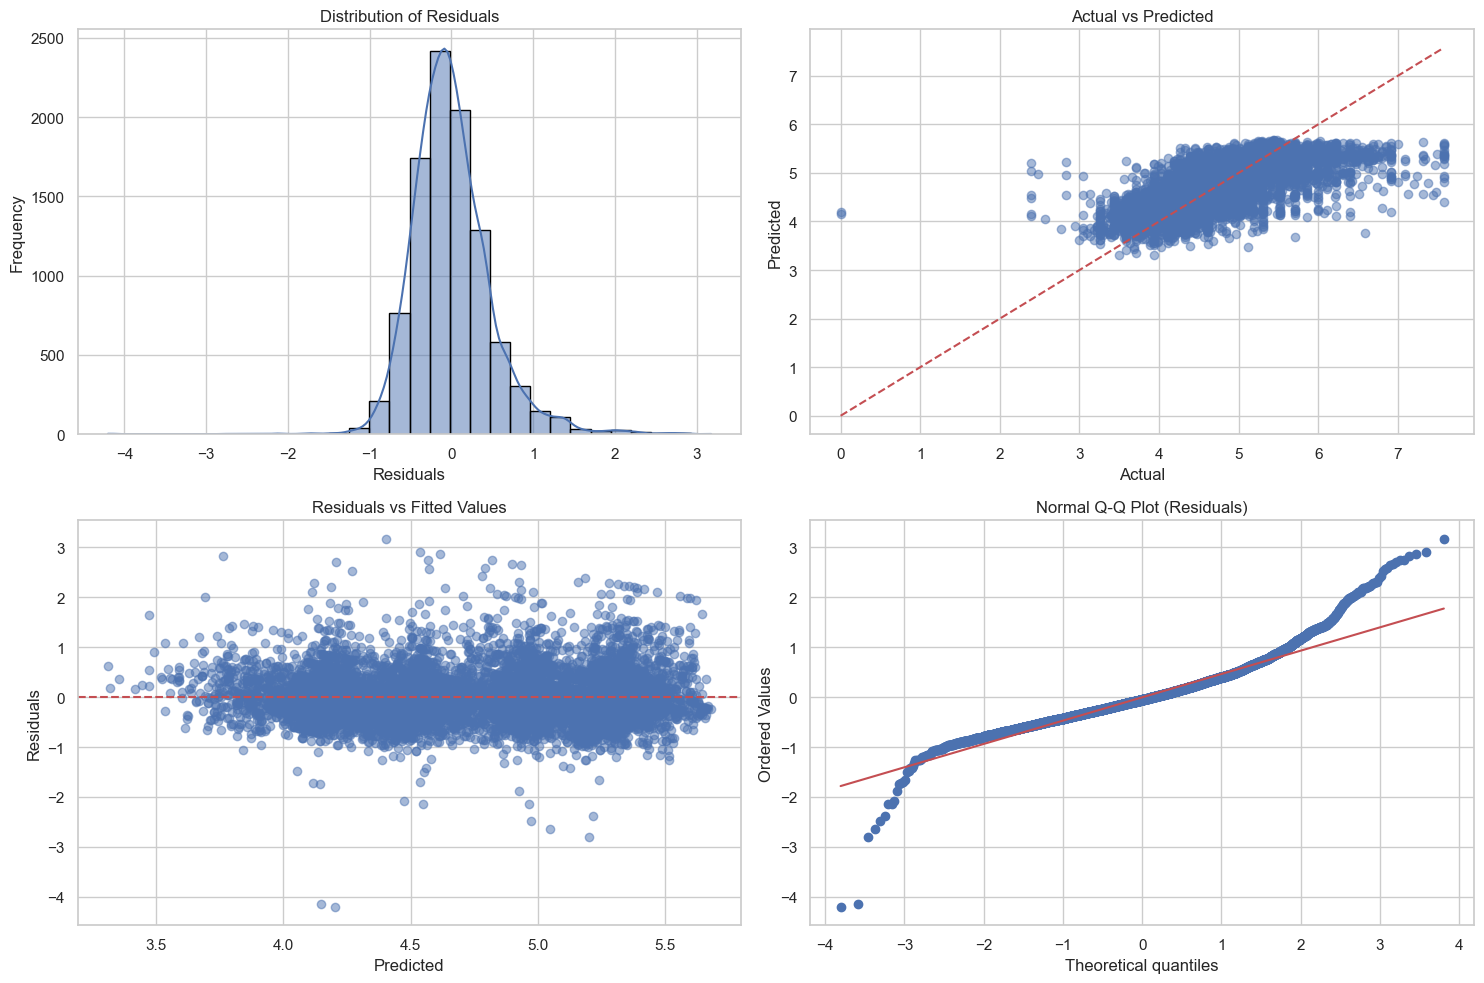

In [451]:
lr_model.visualize_metrics(X_test,y_test)

In [489]:
metrics_lr = lr_model.get_metrics(X_test,y_test)
print(metrics_lr)

MSE              0.231652
RMSE             0.481303
MAE              0.353695
R^2              0.505251
Name    Linear Regression
dtype: object


In [452]:
metrics_df = pd.concat([metrics_df, metrics_lr.to_frame().T])

## Lasso Regression

In [453]:
from sklearn.metrics import mean_squared_error, r2_score

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

lasso_results = {}

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    lasso_results[alpha] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }
    
print("\nRisultati della Regressione Lasso:")
for alpha, performance in lasso_results.items():
    print(f"Alpha: {alpha}, MSE: {performance['MSE']}, R^2: {performance['R^2']}")


Risultati della Regressione Lasso:
Alpha: 0.0001, MSE: 0.23164268569136715, R^2: 0.5052711602869563
Alpha: 0.001, MSE: 0.2316325345329878, R^2: 0.5052928405346695
Alpha: 0.01, MSE: 0.23437873926647126, R^2: 0.499427657797059
Alpha: 0.1, MSE: 0.2780571595470197, R^2: 0.4061418537519208
Alpha: 1, MSE: 0.4683857449746665, R^2: -0.0003507577104655546
Alpha: 10, MSE: 0.4683857449746665, R^2: -0.0003507577104655546
Alpha: 100, MSE: 0.4683857449746665, R^2: -0.0003507577104655546


In [454]:
best_lasso_alpha = max(lasso_results, key=lambda x: (lasso_results[x]['R^2'], -lasso_results[x]['MSE']))
print(f"Miglior Alpha per Lasso: {best_lasso_alpha} con R^2: {lasso_results[best_lasso_alpha]['R^2']} e MSE: {lasso_results[best_lasso_alpha]['MSE']}")

Miglior Alpha per Lasso: 0.001 con R^2: 0.5052928405346695 e MSE: 0.2316325345329878


In [455]:
lasso_model = Model(Lasso(alpha=best_lasso_alpha), name='Lasso')
lasso_model.fit(X_train, y_train)

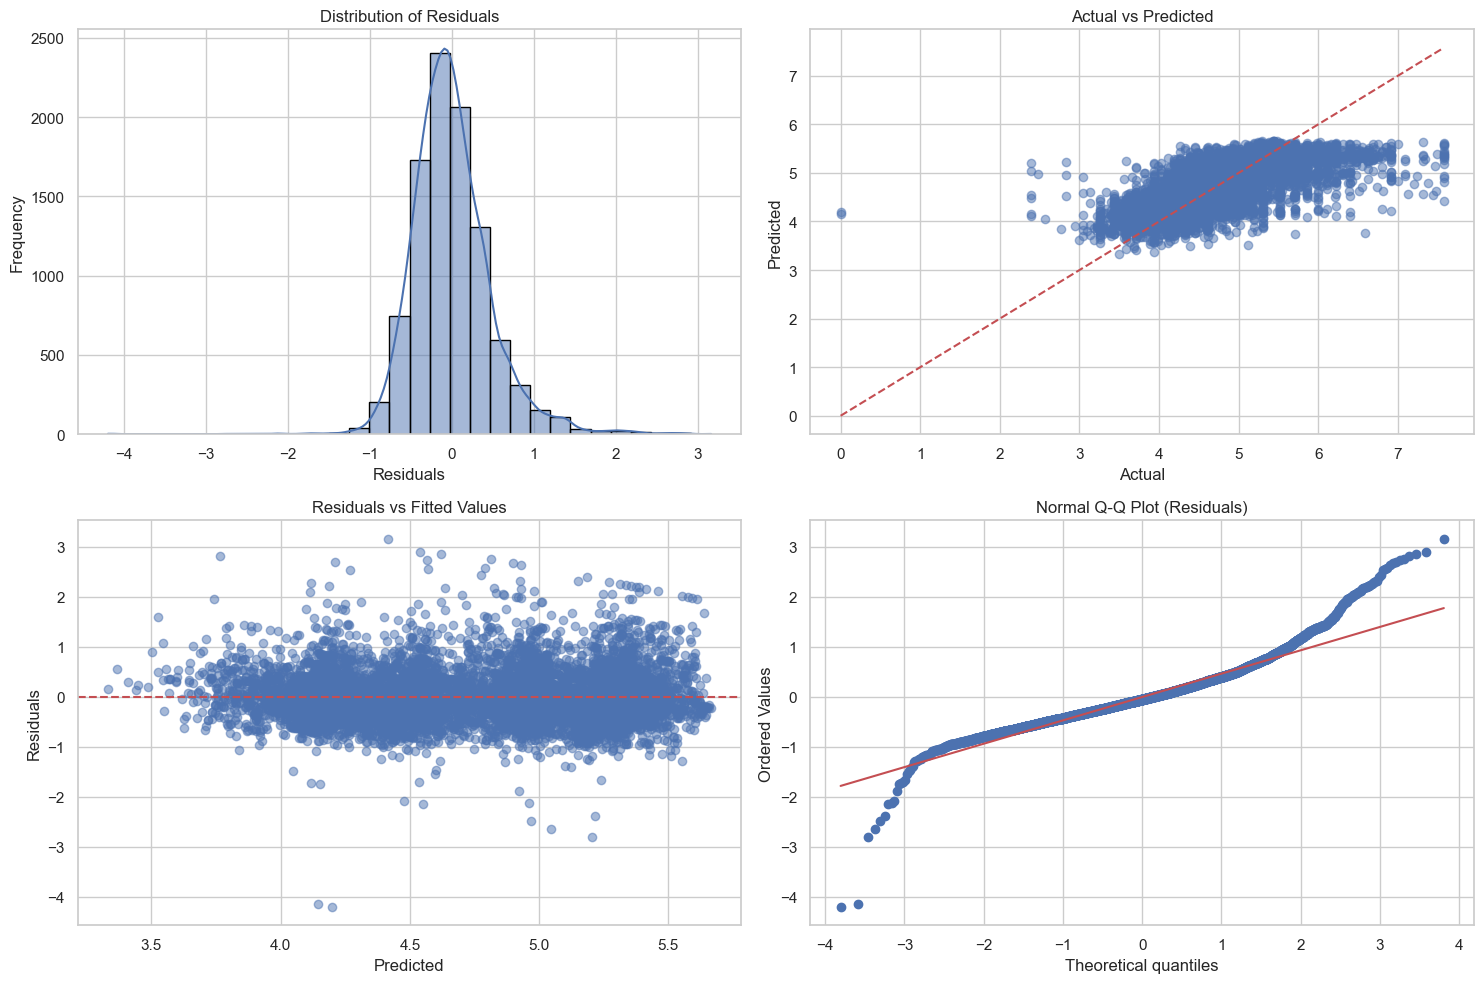

In [491]:
lasso_model.visualize_metrics(X_test, y_test)

In [490]:
metrics_lasso = lasso_model.get_metrics(X_test,y_test)
print(metrics_lasso)

MSE     0.231633
RMSE    0.481282
MAE     0.353465
R^2     0.505293
Name       Lasso
dtype: object


In [457]:
metrics_df = pd.concat([metrics_df, metrics_lasso.to_frame().T])

## Ridge Regression

In [458]:
ridge_results = {}

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    ridge_results[alpha] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'R^2': r2_score(y_test, y_pred)
    }

print("Risultati della Regressione Ridge:")
for alpha, performance in ridge_results.items():
    print(f"Alpha: {alpha}, MSE: {performance['MSE']}, R^2: {performance['R^2']}")

best_ridge_alpha = max(ridge_results, key=lambda x: (ridge_results[x]['R^2'], -ridge_results[x]['MSE']))
print(f"\nMiglior Alpha per Ridge: {best_ridge_alpha} con R^2: {ridge_results[best_ridge_alpha]['R^2']} e MSE: {ridge_results[best_ridge_alpha]['MSE']}")

Risultati della Regressione Ridge:
Alpha: 0.0001, MSE: 0.2316521041238631, R^2: 0.505251044952139
Alpha: 0.001, MSE: 0.23165210368278547, R^2: 0.5052510458941668
Alpha: 0.01, MSE: 0.231652099272173, R^2: 0.5052510553140938
Alpha: 0.1, MSE: 0.23165205518242452, R^2: 0.5052511494783885
Alpha: 1, MSE: 0.23165161592098124, R^2: 0.5052520876271736
Alpha: 10, MSE: 0.23164738535710308, R^2: 0.5052611230169702
Alpha: 100, MSE: 0.2316198523104689, R^2: 0.5053199264804789

Miglior Alpha per Ridge: 100 con R^2: 0.5053199264804789 e MSE: 0.2316198523104689


In [459]:
ridge_model = Model(Ridge(alpha=best_ridge_alpha), name='Ridge')
ridge_model.fit(X_train, y_train)

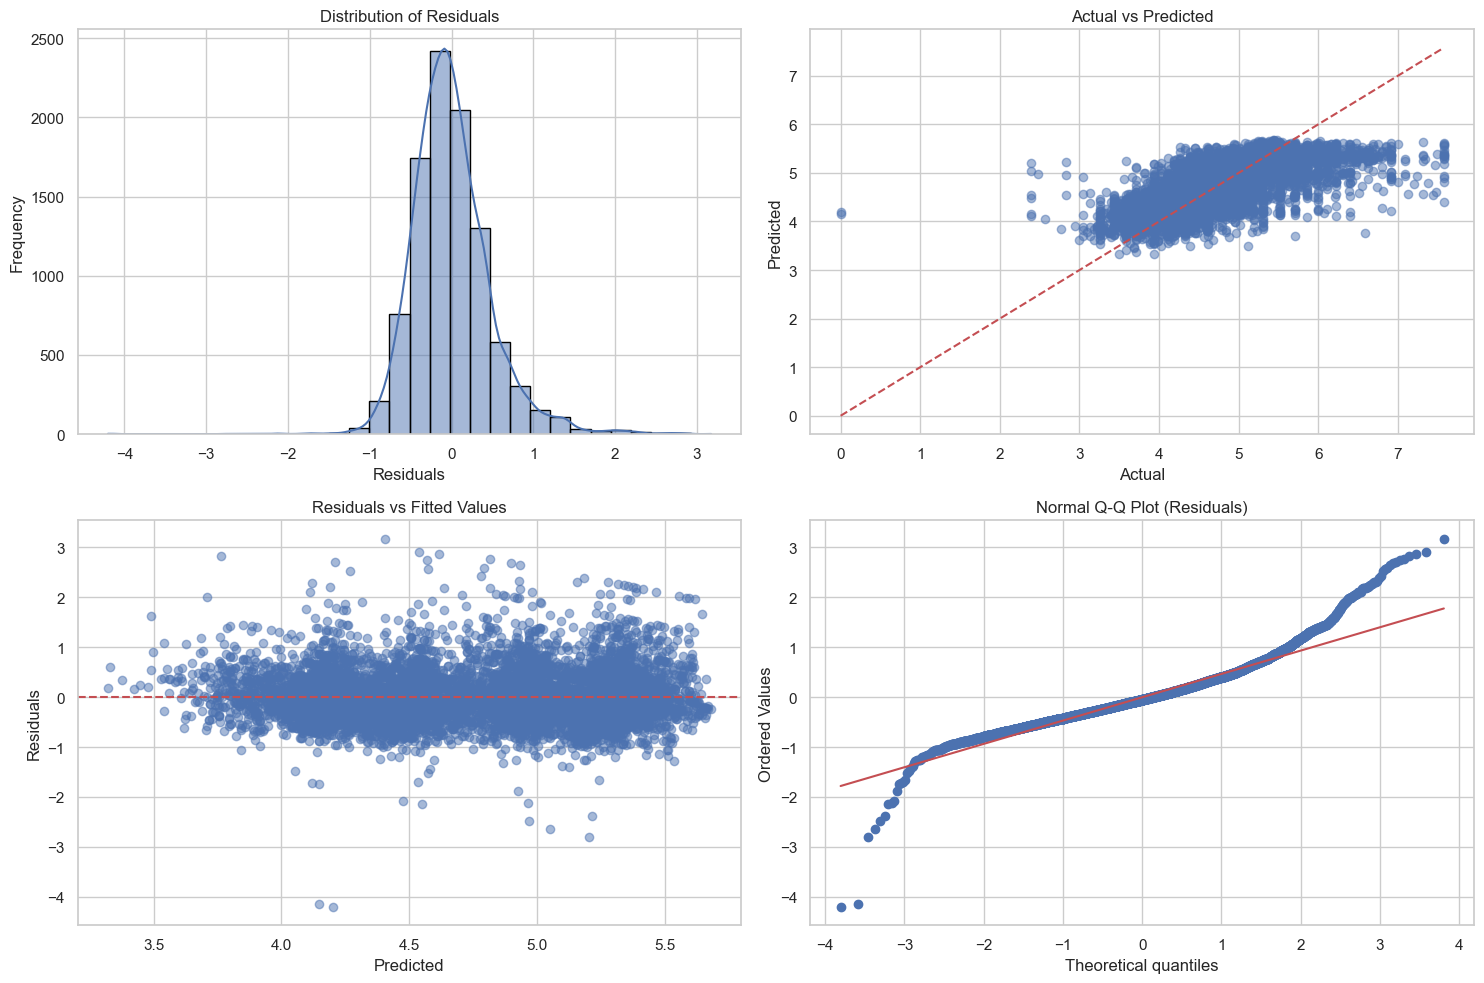

In [460]:
ridge_model.visualize_metrics(X_test, y_test)

In [492]:
metrics_ridge = ridge_model.get_metrics(X_test, y_test)
print(metrics_ridge)

MSE      0.23162
RMSE    0.481269
MAE     0.353589
R^2      0.50532
Name       Ridge
dtype: object


In [462]:
ridge_model.cross_validate(X, y, 5)

MSE     0.240427
RMSE    0.490268
MAE     0.357682
R^2     0.494503
Name       Ridge
dtype: object

In [463]:
metrics_df = pd.concat([metrics_df, metrics_ridge.to_frame().T])

## Random Forest Regressor

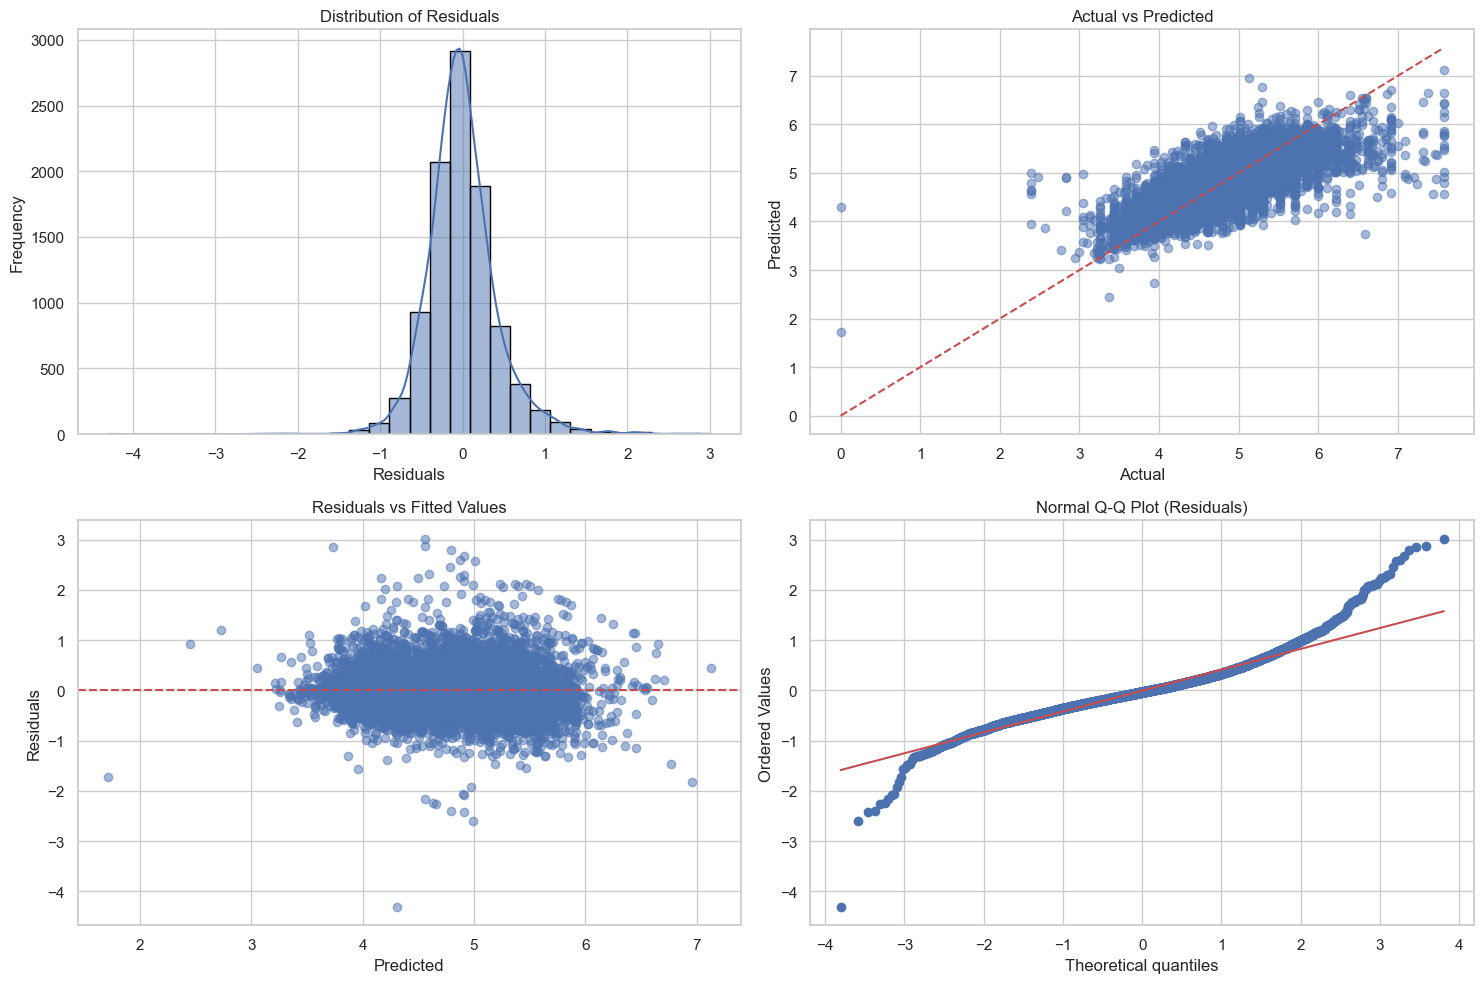

In [464]:
rf_model = Model(RandomForestRegressor(n_estimators=100, random_state=42), name='Random Forest Regressor')
rf_model.fit(X_train, y_train)
rf_model.visualize_metrics(X_test, y_test)

In [465]:
metrics_rf = rf_model.get_metrics(X_test, y_test)
print(metrics_rf)

MSE                    0.182253
RMSE                   0.426911
MAE                    0.306478
R^2                    0.610755
Name    Random Forest Regressor
dtype: object


In [493]:
rf_model.cross_validate(X,y,5)

MSE                    0.189669
RMSE                    0.43541
MAE                    0.310013
R^2                     0.60127
Name    Random Forest Regressor
dtype: object

In [467]:
metrics_df = pd.concat([metrics_df, metrics_rf.to_frame().T])

Text(0.5, 1.0, 'Feature importance Random Forest Regressor')

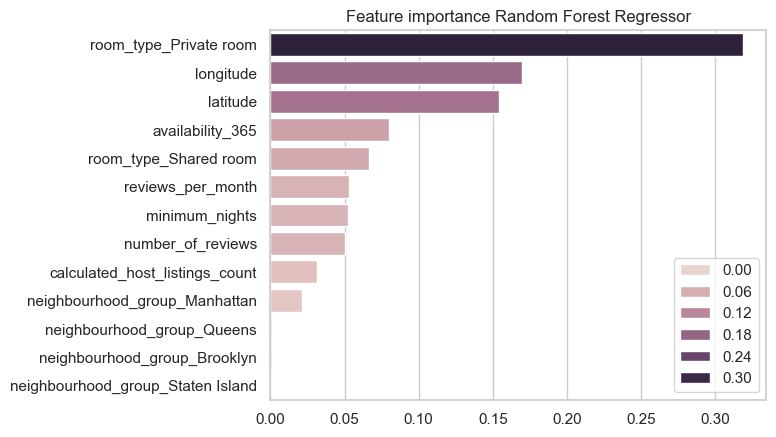

In [468]:
sorted_idx = rf_model.model.feature_importances_.argsort()[::-1]
cols  = []
columns = bnb_df.columns
for i in sorted_idx:
    cols.append(columns[i])

sns.barplot(y=cols, x=rf_model.model.feature_importances_[sorted_idx], hue=rf_model.model.feature_importances_[sorted_idx])
plt.title('Feature importance Random Forest Regressor')

## Decision Tree

In [469]:
max_d = []
for i in range(1,10):
    dtree = DecisionTreeRegressor(max_depth=i)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    max_d.append(round(metrics.r2_score(y_test,y_pred),5))
print(f'Best max depth: {max_d.index(max(max_d))}')
print(f'R^2: {max(max_d)}')

Best max depth: 6
R^2: 0.56136


In [470]:
dt_model = Model(DecisionTreeRegressor(max_depth=max_d.index(max(max_d)), random_state=42), name= 'Decision Tree')

In [471]:
dt_model.fit(X_train, y_train)

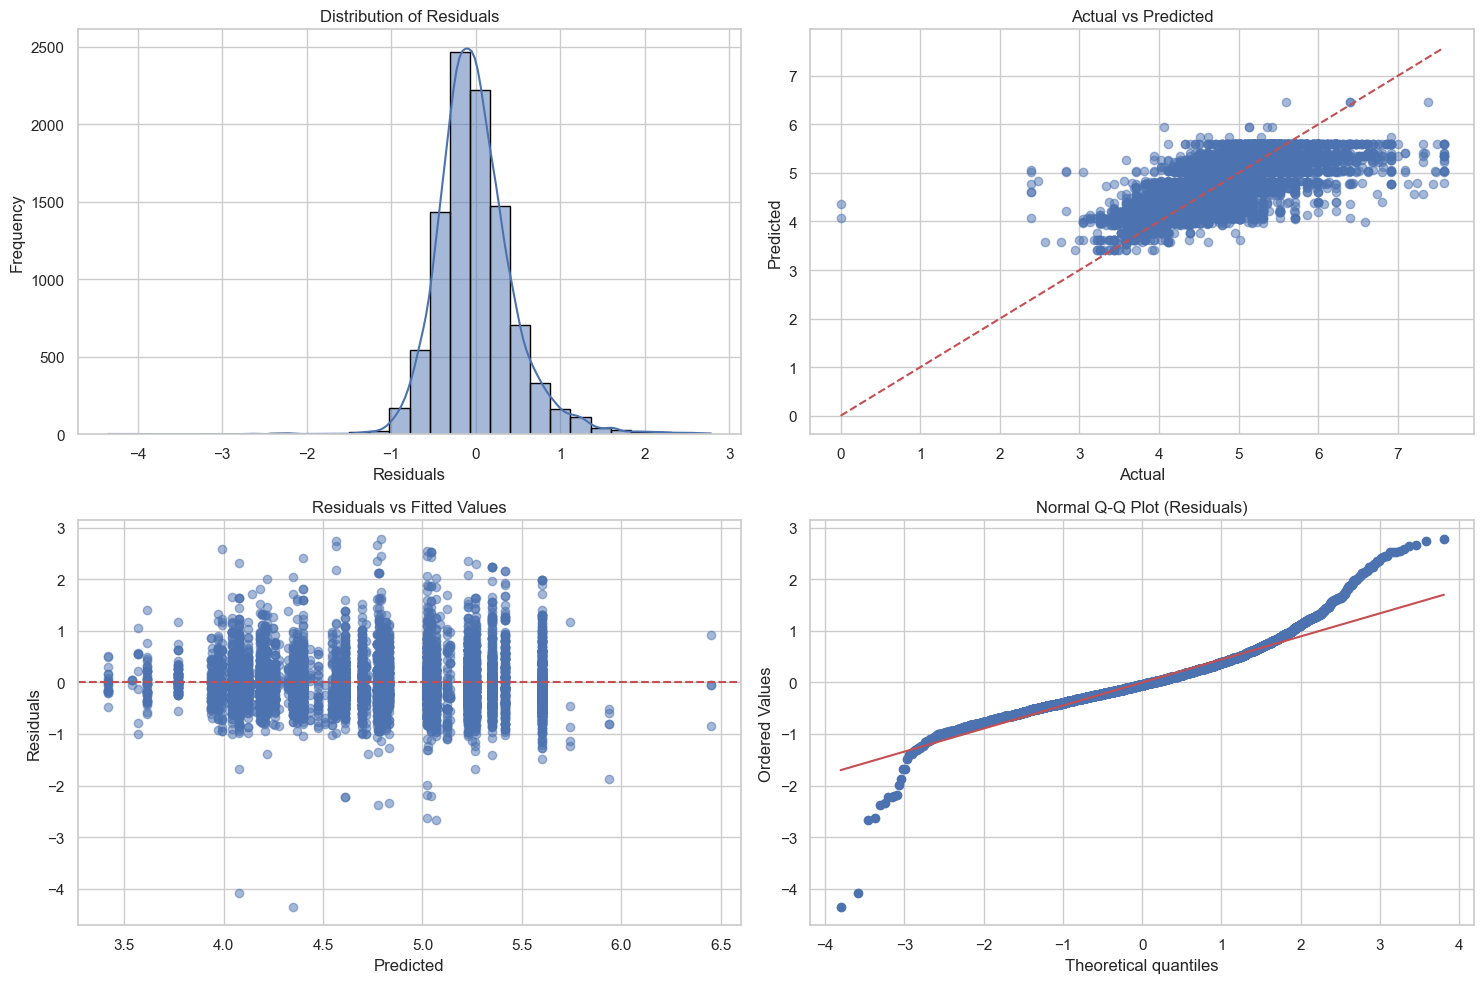

In [472]:
dt_model.visualize_metrics(X_test, y_test)

In [473]:
metrics_dt = dt_model.get_metrics(X_test, y_test)
print(metrics_dt)

MSE           0.21218
RMSE          0.46063
MAE          0.335348
R^2          0.546839
Name    Decision Tree
dtype: object


In [474]:
dt_model.cross_validate(X,y, 5)

MSE          0.220036
RMSE         0.469001
MAE          0.338284
R^2          0.537404
Name    Decision Tree
dtype: object

In [475]:
metrics_df = pd.concat([metrics_df, metrics_dt.to_frame().T])

## XGBoost Regressor

In [476]:
xgb_model = Model(XGBRegressor(), name='XGB Regressor')

In [477]:
xgb_model.fit(X_train, y_train)

In [478]:
#xgb_model.cross_validate(X_test, y_test, 5)

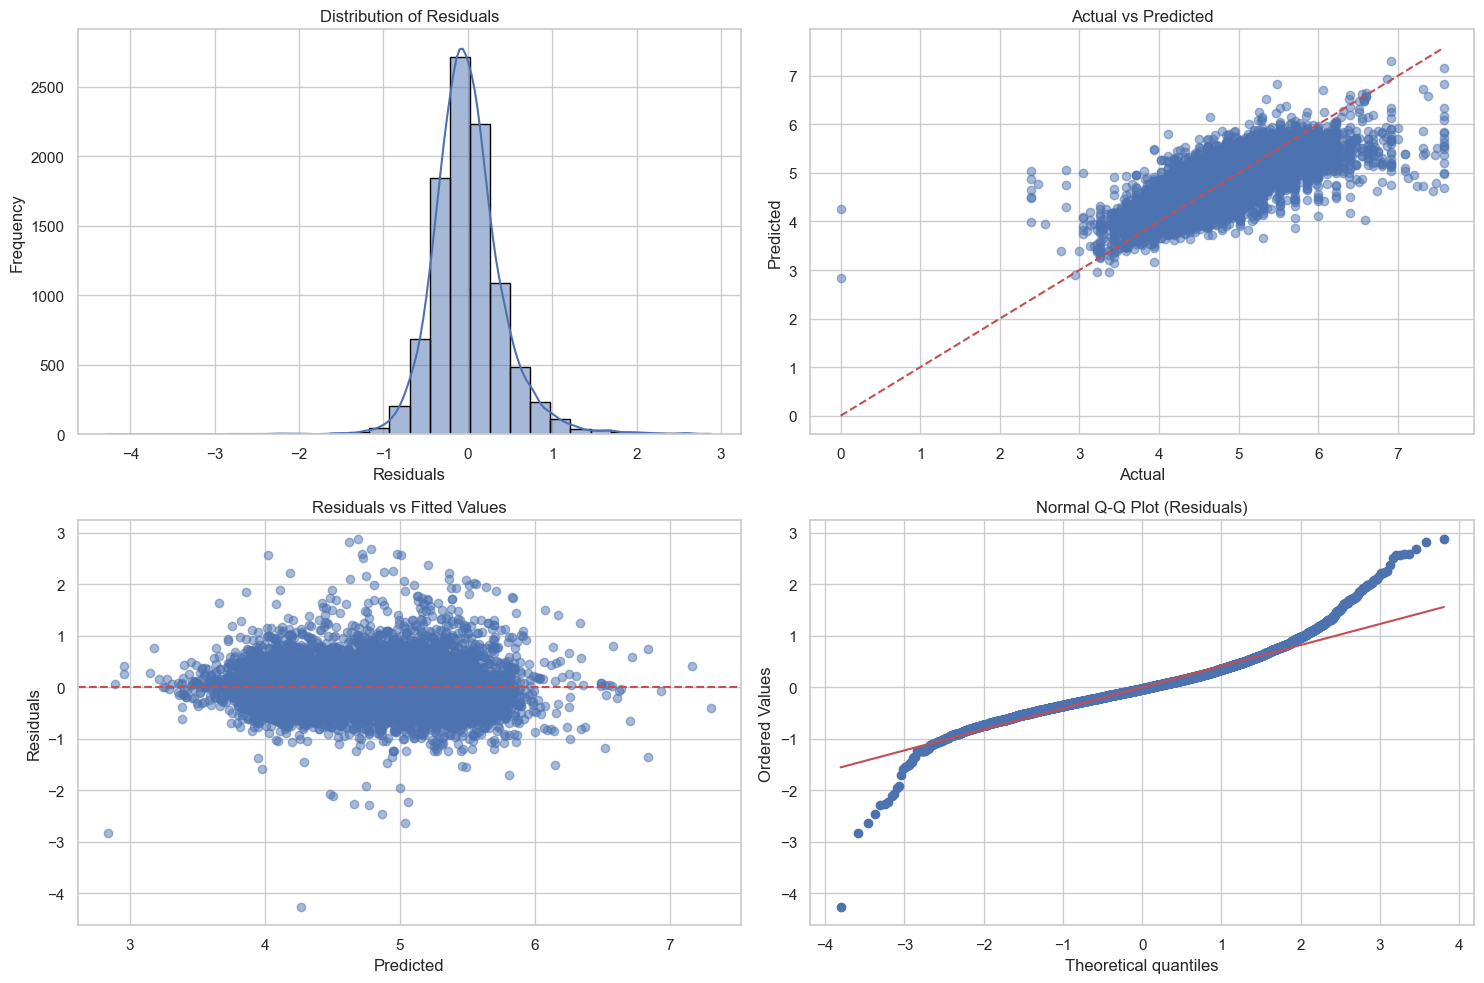

In [479]:
xgb_model.visualize_metrics(X_test, y_test)

In [480]:
metrics_xgb = xgb_model.get_metrics(X_test, y_test)
print(metrics_xgb)

MSE          0.177267
RMSE         0.421031
MAE          0.304692
R^2          0.621404
Name    XGB Regressor
dtype: object


In [481]:
xgb_model.cross_validate(X,y,5)

MSE          0.185865
RMSE         0.431022
MAE          0.308729
R^2          0.609251
Name    XGB Regressor
dtype: object

In [482]:
metrics_df = pd.concat([metrics_df, metrics_xgb.to_frame().T])

Text(0.5, 1.0, 'Feature importance XGBoost')

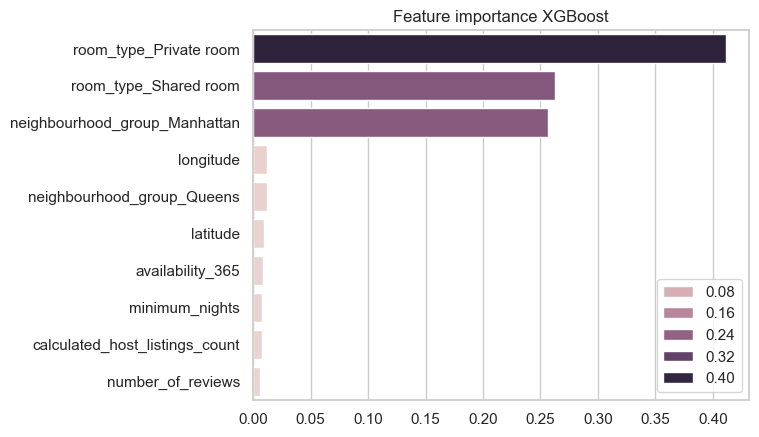

In [483]:
sorted_idx = xgb_model.model.feature_importances_.argsort()[::-1]
cols  = []
columns = bnb_df.columns
for i in sorted_idx:
    cols.append(columns[i])

sns.barplot(y=cols[:10], x=xgb_model.model.feature_importances_[sorted_idx][:10], hue=xgb_model.model.feature_importances_[sorted_idx][:10])
plt.title('Feature importance XGBoost')

In [484]:
metrics_df.index = metrics_df.Name
metrics_df = metrics_df.drop('Name',axis=1)

In [485]:
metrics_df

,MSE,RMSE,MAE,R^2
Name,,,,
Linear Regression,0.231652,0.481303,0.353695,0.505251
Lasso,0.231633,0.481282,0.353465,0.505293
Ridge,0.23162,0.481269,0.353589,0.50532
Random Forest Regressor,0.182253,0.426911,0.306478,0.610755
Decision Tree,0.21218,0.46063,0.335348,0.546839
XGB Regressor,0.177267,0.421031,0.304692,0.621404


/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_97028/1140642899.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')
/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_97028/1140642899.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(metrics_df.index, rotation=45, ha='right')
/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_97028/1140642899.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')
/var/folders/cn/z9gkn6nx58gbgcpgjdrsx7xh0000gn/T/ipykernel_97028/1140642899.py:26: UserWarning: set_ticklabels() should only be used with a fixed number

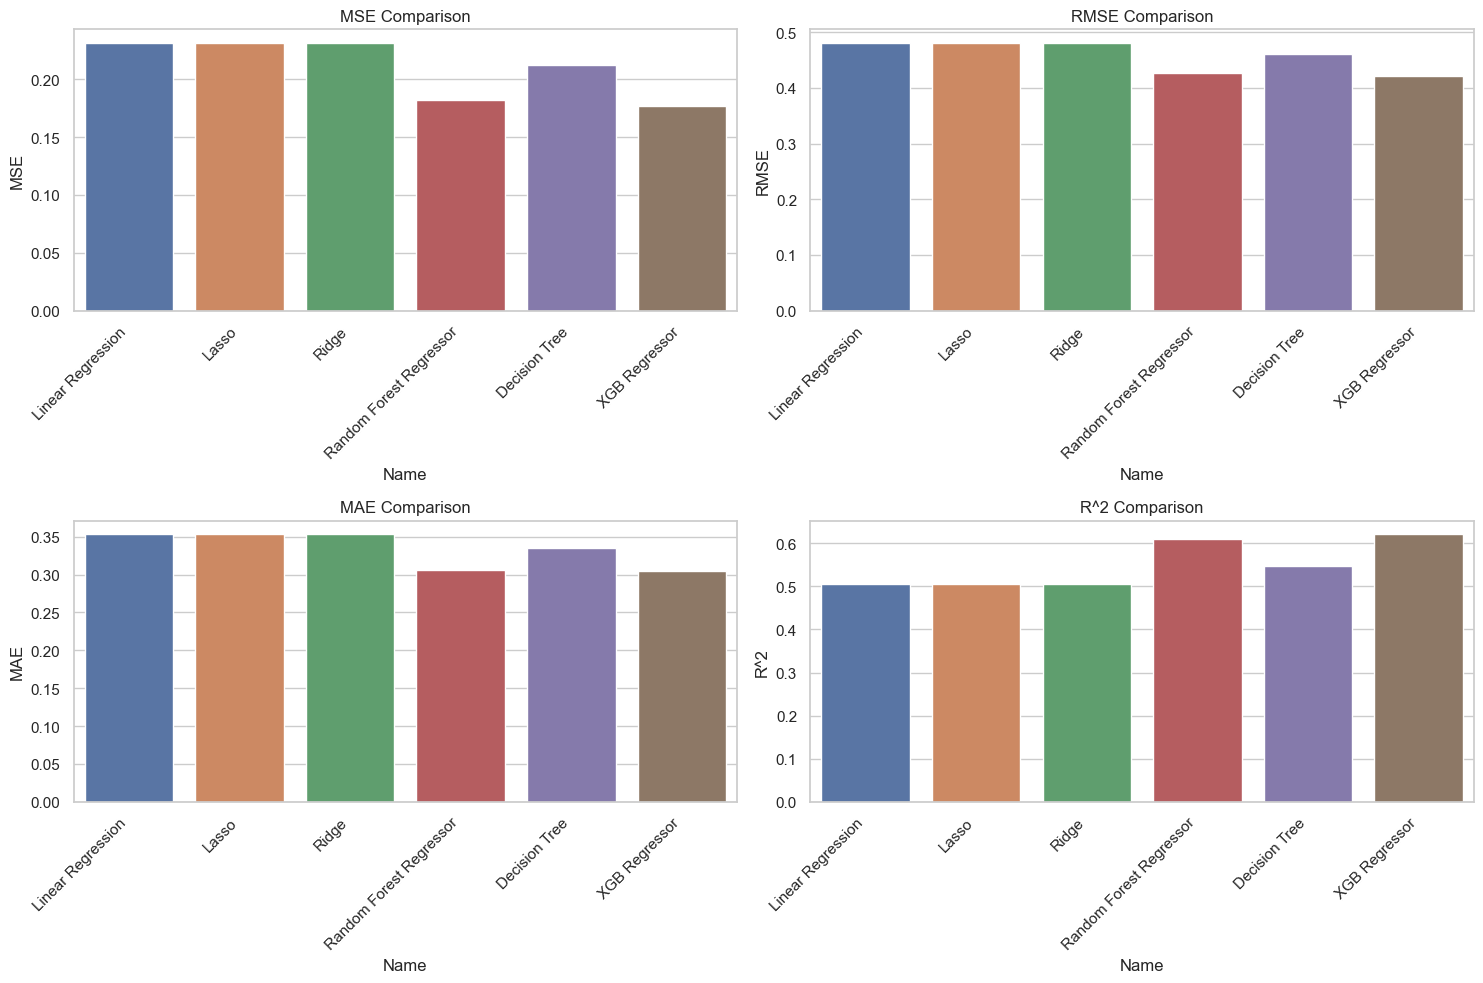

In [486]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# MSE
sns.barplot(x=metrics_df.index, y=metrics_df['MSE'], ax=axes[0, 0], hue=metrics_df.index)
axes[0, 0].set_title('MSE Comparison')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')

# RMSE
sns.barplot(x=metrics_df.index, y=metrics_df['RMSE'], ax=axes[0, 1], hue=metrics_df.index)
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_xticklabels(metrics_df.index, rotation=45, ha='right')

# MAE
sns.barplot(x=metrics_df.index, y=metrics_df['MAE'], ax=axes[1, 0], hue=metrics_df.index)
axes[1, 0].set_title('MAE Comparison')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_xticklabels(metrics_df.index, rotation=45, ha='right')

# R^2
sns.barplot(x=metrics_df.index, y=metrics_df['R^2'], ax=axes[1, 1], hue=metrics_df.index)
axes[1, 1].set_title('R^2 Comparison')
axes[1, 1].set_ylabel('R^2')
axes[1, 1].set_xticklabels(metrics_df.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [487]:
for col in metrics_df.columns:
    if col != 'R^2':
        print(metrics_df.sort_values(by=col, ascending=True)[col].head(1))

Name
XGB Regressor    0.177267
Name: MSE, dtype: object
Name
XGB Regressor    0.421031
Name: RMSE, dtype: object
Name
XGB Regressor    0.304692
Name: MAE, dtype: object


In [488]:
print(metrics_df['R^2'].sort_values(ascending=False).head(1))

Name
XGB Regressor    0.621404
Name: R^2, dtype: object
